**Student Name**:  Sam Roggeman

**Student ID**: S0203247

# Lab 2: Markov Decision Processes

### Instructions: **TODO** tags

This lab on MDPs has two parts:
1. You will need to formulate written scenarios as MDPs.  For this part, please submit drawings of your MDPs - either decent quality photos of sketches, or (if you're feeling fancy) [beautiful tikz graphs](https://www.mathcha.io/editor) (I recommend using the mathcha editor linked here instead of making tikz plots from LaTeX, unless you *really* know what you're doing)
2. In the second half, you will have to implement the MDP from the course. We will use a framework very similar to what we have done before in the Bandits scenario.

As usual, please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results).

At each section, <span style="color:green"> (xx points) </span> indicates the number of points of the entire section (labs are graded out of 10).

### Images in notebook cells
To attach an image to a notebook cell, you can simply **drag & drop** it in the cell. This will create a link like `![image.png](attachment:image.png)` in the cell where your mouse dropped the image. If you want to **adjust the size** of the image, you can *then* replace the link with `<img src="attachment:image.png" width="500">` and this should generate a plot of required width; simply adjust the `width` parameter then.

**If the drag&dropping is acting up** - sometimes it refuses to paste an image (often the 2nd) in a cell. If this happens, you can create a cell below and paste it there. Sorry for the trouble!


## 1. <span style="color:green"> (6 points) </span> Markov Decision Process Statements
*Course Reminder*: a Markov Decision Process (MDP) is a tuple $M = (\mathcal{S}, \mathcal{A}, \mathcal{R}, \gamma, p)$ with $\mathcal{S}$ a set of states, $\mathcal{A}$ a set of actions, $\mathcal{R}$ a set of rewards, $\gamma$ the discount factor, and crucially $p$ the dynamics function $p\left(s^\prime,r \mid s,a \right)$. An MDP is a mathematical object meant to model non-deterministic decision-making situations.
The MDP formalizes the RL framework, by providing the core elements: the sets of states and actions in which our problem takes place, and the dynamics $p$ that define the environment. All that is left to generate a trajectory is the *policy* $\pi \left(a \mid s\right)$ defining the agent. 

Below you can visualize the **link between the RL framework (in black) and its mathematical formulation (in green), as well as its implementation (blue).**
<img src="attachment:agent_env_interactions.gif" width="800">


In this lab, you will have to turn written descriptions of problems into MDPs. Please use the convention below for the drawing of your MDPs:

- states as round, white nodes, with the state name inside
- actions as small black nodes sprouting from the states, with the action name closeby
- transition probability and reward on the edge sprouting from the actions and leading to some other state.
<img src="attachment:mdp_convention_nobg.png" width="300">

The example below is drawn from the [RL book](http://incompleteideas.net/book/the-book-2nd.html) Chapter 3, page 52, example 3.3; you are encouraged to hop there to understand how to turn a problem statement into an MDP. **Please write actual scalar reward and probability values instead of variable names, unlike in the example below**.
<img src="attachment:MDP.png" width="500">
Overall, you can always have this kind of graph in mind when we talk about MDPs, even theoretically.  

### 1.1. Problem statement: a healthy lifestyle
The probabilities and rewards are up to you, but they should be consistent with the problem statement.

> You are a healthy, sane person, but with a weak immune system.
> Every year, you have some probability to get sick, which lowers if you remember to do a health check. When do do a health check and you stay healthy, you sometimes notice it and are happy about it.
> If you are sick, your condition is bad and doing nothing will result in high chances of death, and no chance of recovery whatsoever.
> Your doctor prescribes some medicine for you, which - if you remember to take it- has some probability to cure you. However, even then, chances to die remain, although lowered.

When designing the MDP, make sure that the optimal behavior is to stay healthy and alive!

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Explain** your sketch briefly.
<!-- new line --> 
<br>
<img src="./images/ex1.1.png" width="500">
<br>
When the person is healthy he can either Check Health or Forget to check it. When he does check his health he can still fall sick with a probability of 10% or stay healthy with a probability of 90%, this makes him happy so there is a reward of 1 as stated in the requirements.

When he forgets to check his health he has a bigger risk to fall sick, with 25% and with the same logic where he gets happy when he remembers and stays healthy and got happier as a result, there is a penalty of 1 when he did check his health and got sick, this was not in the requirements but merely my logic. The other 75% is allocated to him staying healthy.

When he is sick, and takes his medicine: He has a 30% chance to stay sick (not explicitly in the requirements) with a reward of 0, a 50% chance on recovery which makes him happy = reward of 1, the other 20% chance is allocated to when he dies and receives a penalty of 100 (= reward of -100) because dying is bad. 

When he forgets to take his medicine though, he had a 5% chance to stay sick without a reward or a 95% chance to die with the same penality as before.



### 1.2. Problem statement: Bowling
```
          |||
          |||
          _._
        .' ..`.
        |     |  <--- ball
         `---'          

           0
          0 0
         0 0 0   <--- pins
        0 0 0 0
```
We want to model the game of bowling, but we will need to severely simplify it.
The scoring system is quite complex, so let's just say the goal is to hit all the pins in the least tries possible.
The player observes the pins and can choose to throw the ball {left, middle, right}, but the transitions are highly stochastic (player's skill and consistency; hard to know the precise outcome of a throw).
- What would the states of the environment be?
- How many states are there in this environment?
Draw a subset of the MDP (stay below 10 states, abstract out the rest), with initial and terminal state, and some possible transitions from all 3 actions from the start state.

<br>
The states of the environment would represent which pins are still standing, as each pin can be represented with either a 0 or a 1 so in total there are 2^10th states = 1024  states



<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
<br>
<img src="./images/ex1.2.png" width="1500">
<br>

The initial state is the state with only 1's aka all the pins are still standing. In my example, when aiming for the middle, the player has a 5% chance to hit all the pins (=strike) and a 10% chance to end up in state s5, 85% to end up in any other state that is not equal to those two represented in the node with only asterisks. This is almost the same as the left and right action but with other states and probabilities. 

The asterisk state is used to abstract the other 1019 states. This is also why it is not useful to talk about actions and chances when leaving said state. It can be seen as an undefined subgraph containing all missing nodes. it can leave the node once it is in a node that already exists inside the main graph, this can be after passing 0 or more nodes. Note that not each state can be reached from the asterisk state depending on which node it entered from but for the sake of simplicity and readability of the graph (or what is left of it), i decided not to expand it any further.






### 1.3. Problem statement: Course's maze
In the slides 7 and 8 of the course, we used a same maze as MDP example:
<br>
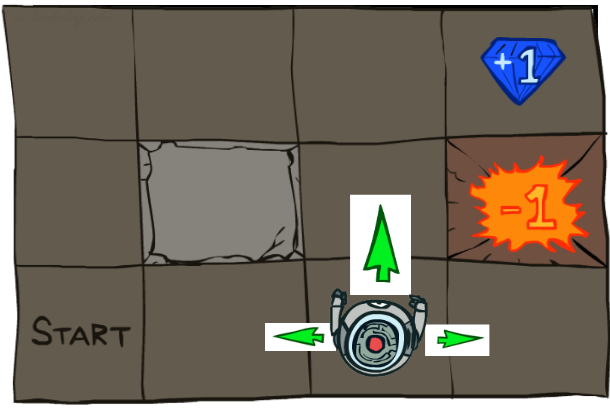

**Draw** the corresponding MDP graph for this problem. A few things need to be clarified:

- Assume no noise. It would make the plot very messy!
- You can use capitals N S E W to shorten the North South East West actions.
- The two states indicated `+1` and `-1` are not yet terminal. They both lead to the same state TERMINAL with unique available action EXIT, and the transition yields the indicated rewards. 
- Assume a small living reward of -0.1 that does not apply for the exit transition.

Note that we could also frame this problem with states indicated `+1` and `-1` being terminal; we do not do this for plotting purposes in the following lab. Stay tuned!

<br>
<img src="./images/ex1.3.1.png" width="900">
<br>
From each state (= position of the again), generally four actions are available (North, East, South, West). The only exception to this is when the agent is either on the diamond or on the lava where the only available action is exit. 

When the agent choses to bump into a wall, it will end up in the same position as it was at the start of the acion. 

Note that I used x,y notation where the start point is located at 0,0 with x increasing when going north and y increasing when going east.

<br>
<img src="./images/ex1.3.2.png?modified=1" width="600">
<br>

There are 4 directions available when leaving from start. for east and north, there is a 10% chance to bump into the wall and thus end up in start again, an 80% chance to go to east and north respectively and another 10% chance to go to north and east respectively. 

When going West or South, there is a 10% (South and West respectivly) + 80% (West and South respectivly) chance to bump into a wall and end up back at start, and another 10% chance to go North or West respectivly. 

- In addition to the MDP, please **draw** (on the side or on a separate plot) how the **start state** would look if there was `noise=0.2`. As a reminder, the `noise` parameter *in this specific MDP* is the probability that the agent is *not* taking the expected action - e.g. doing west when asked north. In our case, it takes you with equal probability to the two orthogonal states, e.g. when asking North, 10% proba to go East, 10% to go West.

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
<img src="attachment:your_plot_here.png" width="300">

## 2. <span style="color:green"> (4 points) </span> <span style="color:blue"> **TODO** </span>: MDP Implementation
By now, you should have a solid grasp of the intricacies of the MDP. The time has come to implement one!
We will implement the MDP from the course (statement 4 above). However, unlike when you had to draw it, we will use `noise=0.2`.

There are multiple methods that we want from an MDP. Let's list them:
- <span style="color:blue"> **TODO** </span> `get_states`: returns all the possible states of the MDP. In other words, all the inputs that the *agent can observe*.
- <span style="color:blue"> **TODO** </span> `get_actions`: given a state, returns all the possible actions from that state.
- <span style="color:blue"> **TODO** </span> `p`: the dynamics, for a given state-action input pair. Return all the possible state-reward output pairs, along with the probability for that to happen. 
- <span style="color:blue"> **TODO** </span> `is_terminal`: given a state, returns whether it is terminal.

These methods provide everything we need to know to draw the MDP. However, if we wanted to use it in practice to run an episode - i.e., use the MDP as an *Environment* to interact with, we need a few different methods. The agent needs to start somewhere, in some starting episode sampled from a subset of $\mathcal{S}$ sometimes called $\mathcal{S}_0$. Then, we need to sample from the dynamics to output a state and reward given a state and action. We follow the [`OpenAI gym`](https://gym.openai.com/docs/) convention:
- <span style="color:blue"> **TODO** </span> `reset`: initializes the environment, outputs a starting state.
- <span style="color:blue"> **TODO** </span> `step`: given an action, performs one step in the environment. Formally, samples from the dynamics. For more complex environment like video games however, it is unthinkable to explicitely formulate the dynamics, but it is generally easy to compute a single transition. Outputs the next state, reward, and done signal, i.e. whether we reached a terminal state.

Note that these functions need to keep track of where the agent is. Feel free to add what you want to the `__init__` method if needed.

*Note: Normally in `gym`, the action space would be defined as `Discrete(5)`, meaning 5 possible actions ranging from 0 to 4, since the strings make no actual sense for the agent. In our environment, we will use actions as strings 'north' 'east' etc. for clarity.*

In [1]:
import numpy as np
import gym
from gym import spaces

In [2]:
class state():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __hash__(self):
        return hash((self.x, self.y))

    def __str__(self):
        return "({}, {})".format(self.x, self.y)

class CourseEnv(gym.Env):
    """ Gridworld environment from the Course. A 4x3 grid with 2 states in the upper right corner 
    leading to the terminal state.
        """
    def __init__(self):
        self.height = 3
        self.width = 4
        self.observation_space = spaces.Tuple(( # observations come in (x,y) tuples with x:height, y:width.
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.actions = ['north', 'east', 'south', 'west', 'exit'] # writing them out for a common convention
        self.noise = .2
        self.start = (2,0)
        self.near_terminals = ((0,3), (1,3)) # state from which there is only the exit action to get to TERMINAL
        self.obstacles = [(1,1)]
        self.living_reward = -0.1
        # You can add elements to this init method if needed.
        self.S = self.start
        self.lava_state = (1,3)
        self.diamond_state = (0,3)

    def step(self, action):
        """ Moves the agent according to the input action.
        You can either sample from the dynamics, or simply (if it feels easier) code the agent's movement.
        """
        print("Executing action {}".format(action))
        if action not in self.available_actions():
            return self.S, 0, self.is_terminal(self.S), {}
        # sample a new state from the dynamics received from p
        dynamics = self.p(self.S, action)
        # pick a tuple (state, reward) from the keys based on the chances present in the values of the dict
        indx = np.random.choice(len(list(dynamics.keys())),1,p=list(dynamics.values()))
        next_state, reward = list(dynamics.keys())[indx[0]]
        self.S = next_state
        done = self.is_terminal(next_state)
        return next_state, reward, done, {} # ignore but keep this last element {}; it is within the gym convention.

    def reset(self):
        """ Prepares for a new episode."""
        self.S = self.start
        return self.S
    def is_passable(self, state):
        if state[0] < 0 or state[0] >= self.height:
            return False
        if state[1] < 0 or state[1] >= self.width:
            return False
        return state not in self.obstacles
    def get_state(self, state, direction):
        new_state: tuple
        if direction == 'north':
            new_state= state[0] - 1, state[1]
        elif direction == 'south':
            new_state= state[0] + 1, state[1]
        elif direction == 'east':
            new_state =state[0], state[1] + 1
        elif direction == 'west':
            new_state= state[0], state[1] - 1
        elif direction == 'exit':
            new_state= "TERMINAL"
        else:
            raise ValueError(f"Invalid direction:{direction}")
        if self.is_passable(new_state):
            return new_state
        return state
    def available_actions(self, state=None):
        """
        List of available actions in the provided state
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from which to provide all actions. If None, use the current environment state.
        Returns
        -------
        ret : list
            List of all actions available in the provided state.
        """
        if not state:
            state = self.S
        if state in self.near_terminals:
            return ['exit']
        if state == "TERMINAL":
            return []
        actions = self.actions.copy()
        actions.remove('exit')
        return actions
    def p(self, state, action):
        """
        Dynamics function p of the MDP in this state and action.
        Parameters
        ----------
        state: tuple (position) or string ('TERMINAL')
            state from which to provide all actions. If the terminal state is provided, raises an error, 
            as there are no dynamics from the terminal state. 
        action: string 
            in list in ['north', 'east', 'south', 'west', 'exit'] with proper state
        Returns
        -------
        ret : dict
            dictionary of (next_state, reward) pairs with: corresponding probabilities
        """
        if state == "TERMINAL":
            raise ValueError("No dynamics from the terminal state")
        if action == "exit":
            reward = 1
            if state == self.diamond_state:
                reward = 1
            elif state == self.lava_state:
                reward = -1
            return {("TERMINAL", reward): 1}
        directions = self.actions[0:4]
        # find the index of the action in the directions list
        if action not in directions:
            return {state: 1}
        index = directions.index(action)
        p:dict = {}
        for offset, prob in [(0,1-self.noise), (1,self.noise/2), (3, self.noise/2)]:
            new_state = self.get_state(state, directions[(index+offset)%4]) 
            # if already in dict
            p[(new_state, self.living_reward)] = prob + p[(new_state, self.living_reward)] if (new_state, self.living_reward) in p else prob 
        return p
    def is_terminal(self, state=None):
        """
        Whether the input state is terminal (string 'TERMINAL').
        If no input state is provided, use the self.S state (assumes there is an ongoing episode).
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from the environment. If None is provided, use the self.S state. 
        Returns
        -------
        ret : bool
            Boolean indicating whether the state is terminal.
        """
        if state:
            return state == "TERMINAL"
        return False
    
    def states(self):
        """
        Set (as a list) of all states of the MDP, i.e. set $\mathcal{S}$
        Returns
        -------
        ret : list
            List of all possible states in the environment.
        """
        states = []
        for obs_space in self.observation_space:
            if obs_space not in self.obstacles:
                states.append(obs_space)
        return states

        
    def render(self):
        """ This method is provided to you. 
        Use this to plot the current position of an agent in your environment.
        """
        s = np.zeros((self.height, self.width), dtype=int).astype(str)
        s[self.start] = 'S'
        s[self.obstacles[0]] = 'X'
        s[self.near_terminals[0]] = '+'
        s[self.near_terminals[1]] = '-'
        s[self.S] = '.'
        
        print(self.S)
        print(s)
        # you can uncomment the following line when the available_actions method is implemented:
        print("Available actions: {}".format(self.available_actions()))


Let's test the different functions of your MDP. <span style="color:red"> **TODO** </span> **Run** the following cells and check that the outputs make sense.

In [3]:
mdp = CourseEnv()

In [4]:
mdp.states()


[Discrete(3), Discrete(4)]

In [5]:
print(mdp.available_actions((0,0)))
print(mdp.available_actions((0,3)))
print(mdp.available_actions('TERMINAL'))

['north', 'east', 'south', 'west']
['exit']
[]


In [6]:
res = mdp.p((0,0), 'north')
print(res)

{((0, 0), -0.1): 0.9, ((0, 1), -0.1): 0.1}


In [7]:
print(mdp.is_terminal((0,0)))
print(mdp.is_terminal((0,3)))
print(mdp.is_terminal('TERMINAL'))

False
False
True


Now play your environment! <span style="color:red"> **TODO** </span> Please submit your notebook with an episode that shows **a successful trajectory** (reaching the positive reward) **and the existence of the obstacle** (the agent cannot step on it).

In [8]:
env = mdp
state = env.reset()
total_r = 0
steps = 0
while True:
    env.render()
    action = input("Please input an action: ")
    state, reward, done, info = env.step(action)
    total_r += reward
    steps += 1
    if done:
        break

print("Done in {} steps with total reward {}".format(steps, total_r))

(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action west
(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action 
(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action 
(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action 
(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action north
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action north
(0, 0)
[['.' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action east
(0, 1)
[['0' '.' '0' '+